# requirements
tensorflow,
skimage,
numpy,
image folders

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from skimage.transform import resize
from skimage import io

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_images(img_folder):
    #os library is used to scan the folder and store the filenames of the images
    filenames = [f.path for f in os.scandir(img_folder) if f.is_file() and f.path.endswith(('.png', '.jpg', '.jpeg'))]
    print('length of given folder is ',len(filenames))
    img = []
    #this loop reads the images data and store into array
    for i in range(len(filenames)):
        img.append(plt.imread(filenames[i]))
    res_img = []
    # resizing of images done using resize function from skimage library
    for i in range(len(img)) :
        res_img.append(resize(img[i], (100,100)))
    # converting list of images to array as neural network models take arrays as input not lists
    import numpy as np
    r_img = np.array(res_img)
    return r_img

In [4]:
A=get_images('positives')

length of given folder is  295


In [5]:
B=get_images('negatives')

length of given folder is  178


In [6]:
#we have read RGBA values of images, we need only RGB values so we have taken only first 3 values of each pixel
A=A[:,:,:,:3]

In [7]:
B=B[:,:,:,:3]

In [8]:
a=[]
b=[]
for i in range(len(A)):
    a.append(1)
for i in range(len(B)):
    b.append(0)

In [9]:
X=np.array(list(A)+list(B))
y=np.array(a+b)

In [10]:
#splitting data into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

In [11]:
#creating neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,BatchNormalization,Flatten,MaxPool2D
model=Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(BatchNormalization())          
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())          
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#displaying our model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 160000)            640000    
_________________________________________________________________
dense (Dense)                (None, 78)                12480078  
_________________________________________________________________
dropout (Dropout)            (None, 78)                0

In [13]:
len(a)

295

In [14]:
len(b)

178

In [15]:
#fitting data into our model by training our model using training data, also validating our model using validation data wether the accuracy is increasing or not
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val),batch_size=50)

Epoch 1/15
7/7 [==============================] - 23s 3s/step - loss: 0.8235 - accuracy: 0.5161 - val_loss: 0.6772 - val_accuracy: 0.6393
Epoch 2/15
7/7 [==============================] - 23s 3s/step - loss: 0.7436 - accuracy: 0.5572 - val_loss: 0.7544 - val_accuracy: 0.3279
Epoch 3/15
7/7 [==============================] - 23s 3s/step - loss: 0.7199 - accuracy: 0.5894 - val_loss: 0.7740 - val_accuracy: 0.3279
Epoch 4/15
7/7 [==============================] - 24s 3s/step - loss: 0.7664 - accuracy: 0.5806 - val_loss: 0.7659 - val_accuracy: 0.3279
Epoch 5/15
7/7 [==============================] - 25s 4s/step - loss: 0.7162 - accuracy: 0.5630 - val_loss: 0.7764 - val_accuracy: 0.3279
Epoch 6/15
7/7 [==============================] - 26s 4s/step - loss: 0.6802 - accuracy: 0.6452 - val_loss: 0.7573 - val_accuracy: 0.4426
Epoch 7/15
7/7 [==============================] - 27s 4s/step - loss: 0.6871 - accuracy: 0.6305 - val_loss: 0.7287 - val_accuracy: 0.4754
Epoch 8/15
7/7 [==================

In [16]:
#gives the probability of our image having a wire
pred=model.predict(X_test)
pred

array([[0.7621274 ],
       [0.6208139 ],
       [0.71079946],
       [0.65122527],
       [0.6751142 ],
       [0.61374855],
       [0.6690086 ],
       [0.61500156],
       [0.7898059 ],
       [0.64439833],
       [0.65689194],
       [0.63989055],
       [0.67752767],
       [0.6753013 ],
       [0.6708923 ],
       [0.62611943],
       [0.6736397 ],
       [0.6002961 ],
       [0.6056671 ],
       [0.55621505],
       [0.5978639 ],
       [0.5799786 ],
       [0.64193267],
       [0.7578726 ],
       [0.62828964],
       [0.64792573],
       [0.5650449 ],
       [0.52855945],
       [0.5707708 ],
       [0.6956539 ],
       [0.6708272 ],
       [0.6577907 ],
       [0.6526509 ],
       [0.67615557],
       [0.62082255],
       [0.6204947 ],
       [0.55910206],
       [0.6994965 ],
       [0.65594286],
       [0.51406044],
       [0.5095894 ],
       [0.6260866 ],
       [0.6612827 ],
       [0.5883089 ],
       [0.6356479 ],
       [0.7315733 ],
       [0.6719444 ],
       [0.726

In [17]:
L=[]
for i in pred:
    if i>0.65:
        L.append(1)
    else:
        L.append(0)

In [18]:
p=np.array(L)
p

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0])

In [19]:
#preparing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.29      0.52      0.37        21
           1       0.70      0.46      0.55        50

    accuracy                           0.48        71
   macro avg       0.49      0.49      0.46        71
weighted avg       0.58      0.48      0.50        71



In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2

In [22]:
#using vgg architecture 
vgg = VGG19(input_shape=(100,100,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [23]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
#creating model
model = Model(inputs=vgg.input, outputs=prediction)

In [24]:
#displaying the model architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [25]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [67]:
#training using vgg model
history=model.fit(X_train,y_train,epochs=25,validation_data=(X_val,y_val),batch_size=50)

Epoch 1/25
7/7 [==============================] - 19s 3s/step - loss: 0.5156 - accuracy: 0.7625 - val_loss: 0.5208 - val_accuracy: 0.7049
Epoch 2/25
7/7 [==============================] - 15s 2s/step - loss: 0.3527 - accuracy: 0.8416 - val_loss: 0.3321 - val_accuracy: 0.8852
Epoch 3/25
7/7 [==============================] - 18s 3s/step - loss: 0.2712 - accuracy: 0.9267 - val_loss: 0.3023 - val_accuracy: 0.9016
Epoch 4/25
7/7 [==============================] - 18s 3s/step - loss: 0.2360 - accuracy: 0.9238 - val_loss: 0.2790 - val_accuracy: 0.9016
Epoch 5/25
7/7 [==============================] - 18s 3s/step - loss: 0.1899 - accuracy: 0.9501 - val_loss: 0.2285 - val_accuracy: 0.9180
Epoch 6/25
7/7 [==============================] - 18s 3s/step - loss: 0.1767 - accuracy: 0.9589 - val_loss: 0.2176 - val_accuracy: 0.9180
Epoch 7/25
7/7 [==============================] - 17s 3s/step - loss: 0.1594 - accuracy: 0.9531 - val_loss: 0.2214 - val_accuracy: 0.9180
Epoch 8/25
7/7 [==================

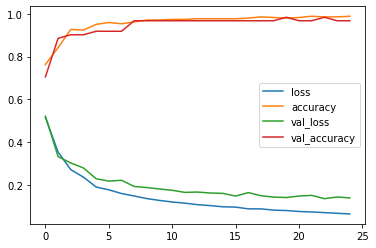

In [68]:
# plot of losses and accuracies, losses should decrease and accuracy should increase
import pandas as pd
hs=pd.DataFrame(model.history.history)
hs.plot()

In [69]:
pred=model.predict(X_test)
pred

array([[0.9987062 ],
       [0.999095  ],
       [0.9922708 ],
       [0.9814569 ],
       [0.973678  ],
       [0.03015482],
       [0.9588673 ],
       [0.713175  ],
       [0.9965062 ],
       [0.06195825],
       [0.9499779 ],
       [0.17228588],
       [0.92904705],
       [0.40921602],
       [0.9914949 ],
       [0.8972141 ],
       [0.99649763],
       [0.0593136 ],
       [0.44912508],
       [0.05287328],
       [0.02403918],
       [0.9817313 ],
       [0.03600013],
       [0.6000702 ],
       [0.9126817 ],
       [0.9999299 ],
       [0.99616206],
       [0.99985915],
       [0.99692446],
       [0.01447263],
       [0.99947214],
       [0.9924474 ],
       [0.99665344],
       [0.86895585],
       [0.99928343],
       [0.06326002],
       [0.99815595],
       [0.9001001 ],
       [0.99697393],
       [0.9931392 ],
       [0.36457965],
       [0.998636  ],
       [0.88701886],
       [0.9971221 ],
       [0.22876346],
       [0.1362775 ],
       [0.99952257],
       [0.667

In [70]:
L=[]
for i in pred:
    if i>0.5:  #we can set any threshold from 0.3 to 0.9
        L.append(1)
    else:
        L.append(0)

In [71]:
p=np.array(L)
p

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1])

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.94      0.98      0.96        45

    accuracy                           0.94        71
   macro avg       0.95      0.93      0.94        71
weighted avg       0.94      0.94      0.94        71



In [32]:
#need to have image in current directory
sample=plt.imread('varun photo.jpeg')

In [33]:
s=resize(sample,(100,100))

In [34]:
s.shape

(100, 100, 3)

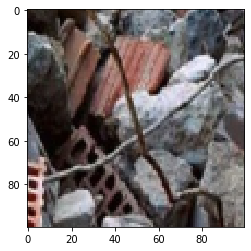

In [35]:
plt.imshow(s)

In [36]:
s=s.reshape(1,100,100,3)

In [37]:
model.predict(s)

array([[0.97173274]], dtype=float32)

In [212]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
#creating model
model2 = Model(inputs=vgg.input, outputs=prediction)

In [213]:
model2.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [214]:
# datA augmentation creates new images by rotating, width shifting etc which lets our model not to overfit
aug=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,)

In [215]:
history=model2.fit(aug.flow(X_train,y_train,batch_size=32),epochs=25,validation_data=(X_val,y_val),batch_size=32)

Epoch 1/25
11/11 [==============================] - 17s 2s/step - loss: 0.6127 - accuracy: 0.6774 - val_loss: 0.4331 - val_accuracy: 0.8361
Epoch 2/25
11/11 [==============================] - 16s 1s/step - loss: 0.3904 - accuracy: 0.8651 - val_loss: 0.3576 - val_accuracy: 0.8852
Epoch 3/25
11/11 [==============================] - 19s 2s/step - loss: 0.3279 - accuracy: 0.9003 - val_loss: 0.2619 - val_accuracy: 0.9016
Epoch 4/25
11/11 [==============================] - 18s 2s/step - loss: 0.2975 - accuracy: 0.9091 - val_loss: 0.2351 - val_accuracy: 0.9016
Epoch 5/25
11/11 [==============================] - 18s 2s/step - loss: 0.2432 - accuracy: 0.9091 - val_loss: 0.2182 - val_accuracy: 0.9180
Epoch 6/25
11/11 [==============================] - 18s 2s/step - loss: 0.2305 - accuracy: 0.9267 - val_loss: 0.1892 - val_accuracy: 0.9508
Epoch 7/25
11/11 [==============================] - 19s 2s/step - loss: 0.2249 - accuracy: 0.9179 - val_loss: 0.1983 - val_accuracy: 0.9344
Epoch 8/25
11/11 [==

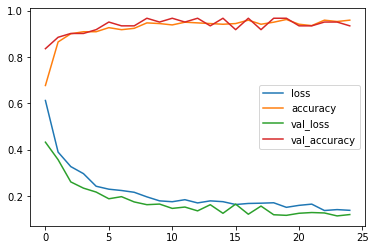

In [216]:
import pandas as pd
hs=pd.DataFrame(model2.history.history)
hs.plot()

In [217]:
pred=model2.predict(X_test)
pred

array([[0.99814373],
       [0.9997245 ],
       [0.9884093 ],
       [0.9917424 ],
       [0.992978  ],
       [0.04118487],
       [0.9550686 ],
       [0.4172446 ],
       [0.99853146],
       [0.09285665],
       [0.97224295],
       [0.15236405],
       [0.97554934],
       [0.48325053],
       [0.99071574],
       [0.9570594 ],
       [0.9881393 ],
       [0.08984056],
       [0.33087057],
       [0.07132193],
       [0.03576788],
       [0.9321871 ],
       [0.02496698],
       [0.6508912 ],
       [0.96051663],
       [0.9999827 ],
       [0.9958166 ],
       [0.9998454 ],
       [0.99976206],
       [0.02488112],
       [0.99960023],
       [0.9915986 ],
       [0.99814403],
       [0.9175374 ],
       [0.99932575],
       [0.04945803],
       [0.9993136 ],
       [0.95897627],
       [0.99917024],
       [0.9942139 ],
       [0.3667814 ],
       [0.99766046],
       [0.9665886 ],
       [0.9972114 ],
       [0.11141455],
       [0.2196841 ],
       [0.9999443 ],
       [0.677

In [218]:
L=[]
for i in pred:
    if i>0.6:  #we can set any threshold from 0.3 to 0.9
        L.append(1)
    else:
        L.append(0)

In [219]:
p=np.array(L)
p

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1])

In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.96      0.98      0.97        45

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71

